# Problem Set II - 40313 Introduction to Probability

## Question 1

## Question 2

### 2a.

Simulate in Matlab or in Python 1000 random variables with uniform distribution on $[0,1]$: $x_1,\dots,x_{1000}$.

In [ ]:
import numpy as np

SAMPLE_SIZE: int = 1000
RNG_SEED: int = 40313

rng = np.random.default_rng(RNG_SEED)

# Techically, the value for 1 is excluded as it could pose some issues when calculating the inverse at point 2 (the function excludes it automatically)
x = rng.uniform(low=0.0, high=1.0, size=SAMPLE_SIZE)

### 2b.

Find $y_i=F^{-1}(x_i)$ where $F$ is the distribution function of the exponential distribution with parameter $\lambda=1$.

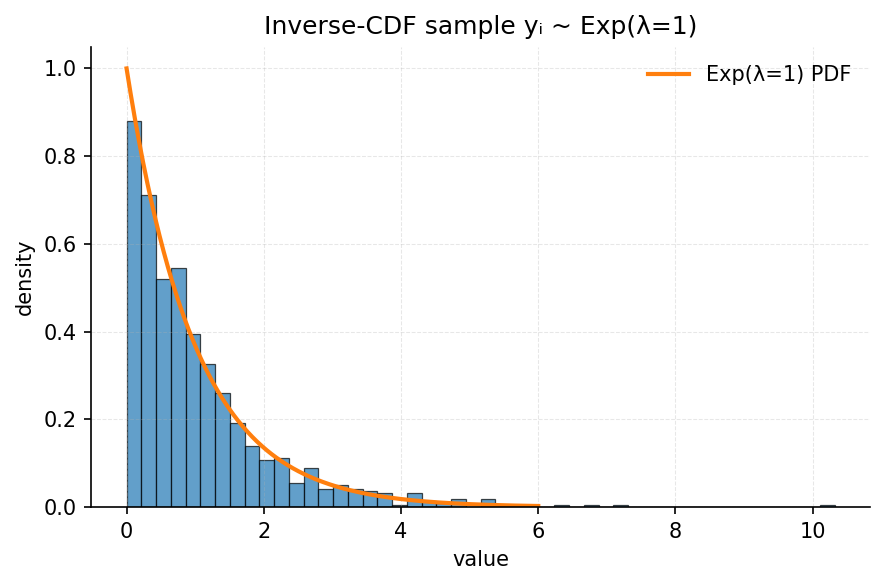

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def inv_cdf_exp_rate1(u: np.ndarray, allow_inf: bool = False) -> np.ndarray:
    """
    I think the title is self-explanatory - Stefano
    """
    return -np.log1p(-u)



def plot_exp_hist(data: np.ndarray, title: str) -> None:
    """Plot histogram of data and overlay Exp(\lambda=1) PDF."""
    fig = plt.figure(figsize=(6.0, 4.0), dpi=150)
    ax = plt.gca()

    # Histogram
    ax.hist(
        data,
        bins="fd",
        density=True,
        alpha=0.7,
        edgecolor="black",
        linewidth=0.6,
    )

    # Theoretical Exp(1) PDF
    x_max = max(6.0, float(np.percentile(data, 99.5)))
    grid = np.linspace(0.0, x_max, 600)
    pdf = np.exp(-grid)
    ax.plot(grid, pdf, linewidth=2.0, label="Exp(λ=1) PDF")

    # Labels & cosmetics
    ax.set_title(title)
    ax.set_xlabel("value")
    ax.set_ylabel("density")
    ax.grid(True, alpha=0.3, linestyle="--", linewidth=0.5)
    for spine in ("top", "right"):
        ax.spines[spine].set_visible(False)
    ax.legend(frameon=False)
    fig.tight_layout()
    plt.show()


# Transform and visualize
y = inv_cdf_exp_rate1(x, allow_inf=False)
plot_exp_hist(y, title="Inverse-CDF sample yᵢ ~ Exp(λ=1)")

### 2c.

Simulate 1000 random variables $z_1,\dots,z_{1000}$ with exponential distribution with parameter $\lambda=1$.

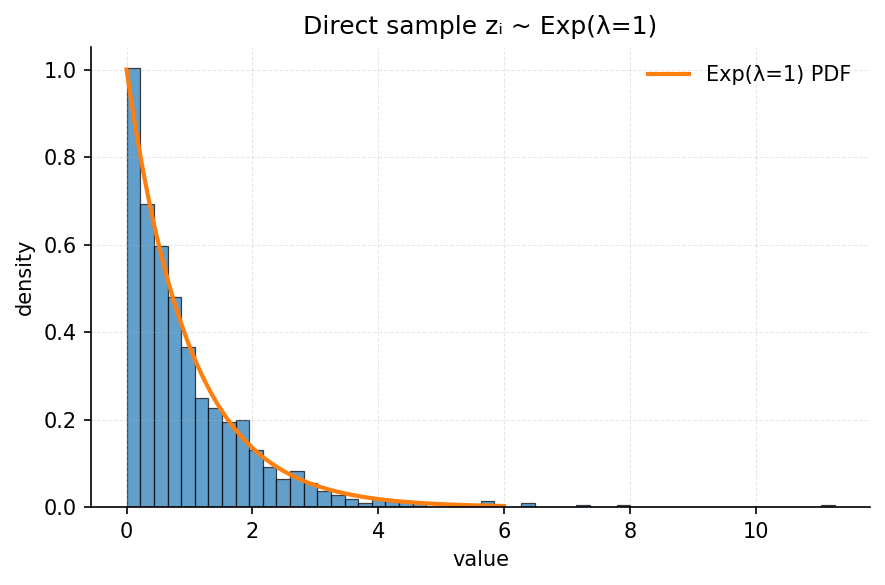

In [10]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE: int = 1000
RNG_SEED_2: int = 39  # Different seed to ensure different draws

rng2 = np.random.default_rng(RNG_SEED_2)

z = rng2.exponential(scale=1.0, size=SAMPLE_SIZE)

plot_exp_hist(z, title="Direct sample zᵢ ~ Exp(λ=1)")

### 2d.

Compare the histogram of the $y_i$ with the histogram of the $z_i$.

In [ ]:
import numpy as np
from scipy import stats

y_f = y[np.isfinite(y)]
z_f = z[np.isfinite(z)]

# 1) Kolmogorov–Smirnov two-sample test (global, bin-free)
ks = stats.ks_2samp(y_f, z_f, alternative="two-sided", method="auto")

# 2) Cramér–von Mises two-sample test (sensitive across the whole CDF)
cvm = stats.cramervonmises_2samp(y_f, z_f)

# 3) Wasserstein-1 distance (Earth Mover’s Distance): a scale-in-units metric
w1 = stats.wasserstein_distance(y_f, z_f)

print(f"KS test:                 D = {ks.statistic:.4f}, p = {ks.pvalue:.4g}")
print(f"Cramér–von Mises test:   T = {cvm.statistic:.4f}, p = {cvm.pvalue:.4g}")
print(f"Wasserstein-1 distance:  W-1 = {w1:.4f}")

KS test:                 D = 0.0470, p = 0.2194
Cramér–von Mises test:   T = 0.3134, p = 0.124
Wasserstein-1 distance:  W₁ = 0.0714


Across 1,000 draws, the two‐sample tests show no evidence that the samples differ: KS $D=0.047$ ($p=0.219$) and Cramer–von Mises $T=0.313$ ($p=0.124$) both fail to reject the null that $y_i$ (inverse-CDF) and $z_i$ (direct) come from the same distribution. The Wasserstein distance $W_1=0.071$ is small in the natural units of the variable (for $\mathrm{Exp}(1)$, $\sigma=1$), i.e., about 7% of one standard deviation—well within Monte Carlo variability. 

Overall, the results are consistent with both methods producing i.i.d. $\mathrm{Exp}(1)$ samples, confirming the correctness of the inverse-transform step.